<a href="https://colab.research.google.com/github/r2x4/machine_alura_oracle/blob/main/analisi_datos_IA/datos_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#af7ac5'>**IA aumentada: Prevision de atrasos de Vuelos**</h1>

In [178]:
# importar bibliotecas
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick

In [179]:
print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [180]:
datos = pd.read_csv('/content/flights.csv')

In [181]:
datos.sample(7)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
61820,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,106,2021,False,-20.334427
56288,24,BZ,Airbus A320,schengen,FJB,9.668655,12.668655,102,2020,False,3.680233
31801,25,BZ,Boeing 777,non-schengen,CSF,19.341235,23.341235,295,2015,False,6.967534
44811,1,BZ,Airbus A320,non-schengen,CNU,15.496519,18.496519,67,2018,False,8.565284
19643,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,214,2013,False,-0.456119
19403,20,YE,Boeing 787,schengen,MWL,16.909690,18.909690,198,2013,False,18.262037
1170,4,BZ,Airbus A330,schengen,TCY,11.781391,14.781391,78,2010,False,-19.731219


In [182]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [183]:
# metadatos osea datos de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [184]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [185]:
# variables categoricas
datos.describe(include='object')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [186]:
datos.isnull().sum()

,0
flight_id,0
airline,0
aircraft_type,0
schengen,0
origin,0
arrival_time,0
departure_time,0
day,0
year,0
is_holiday,0


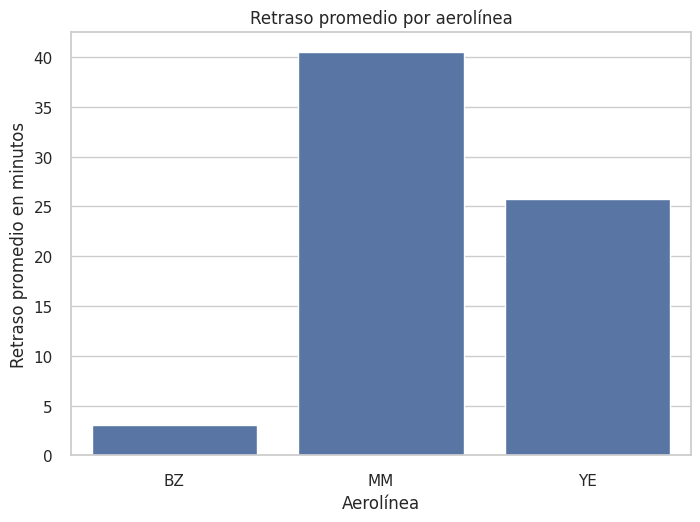

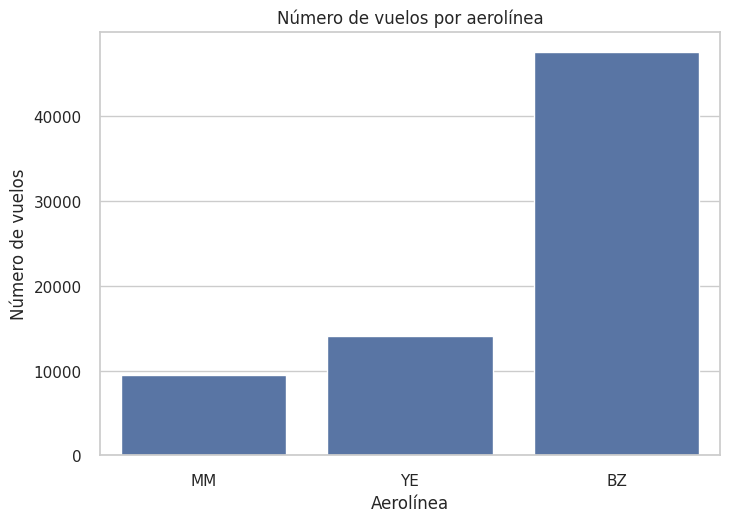

In [187]:
# graficos de vuelos

avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Retraso promedio por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Retraso promedio en minutos')
plt.show()

# vamos aver por aerolineas
sns.countplot(x='airline', data=datos)
plt.title('Número de vuelos por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Número de vuelos')
plt.show()

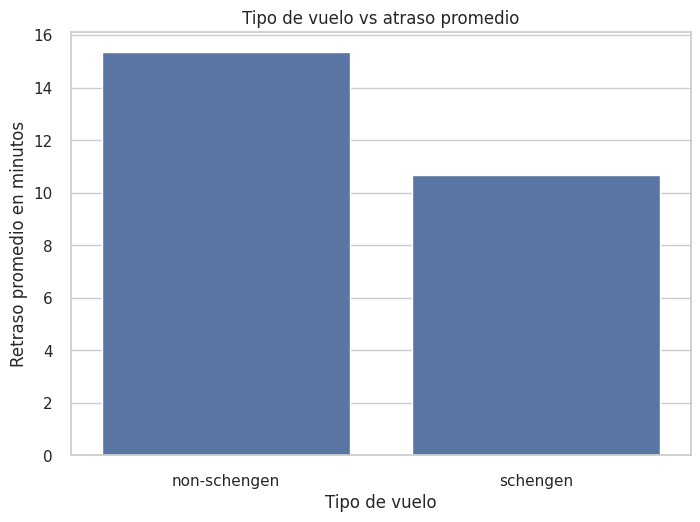

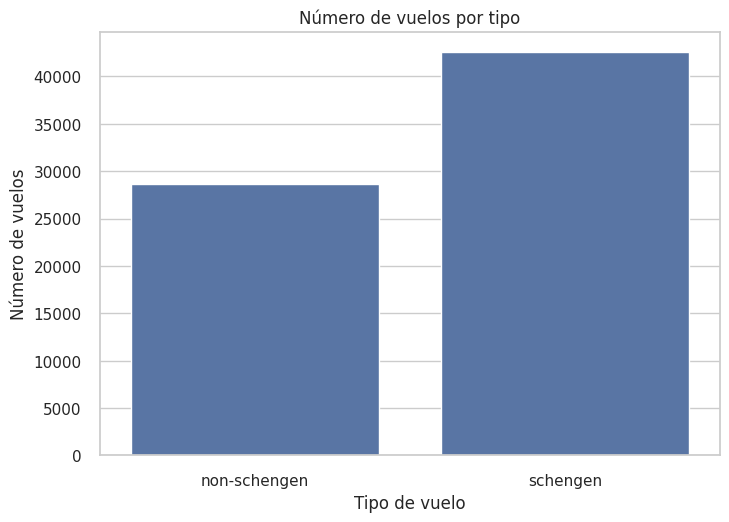

In [188]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Retraso promedio en minutos')
plt.show()

# vamos aver por aerolineas
sns.countplot(x='schengen', data=datos)
plt.title('Número de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

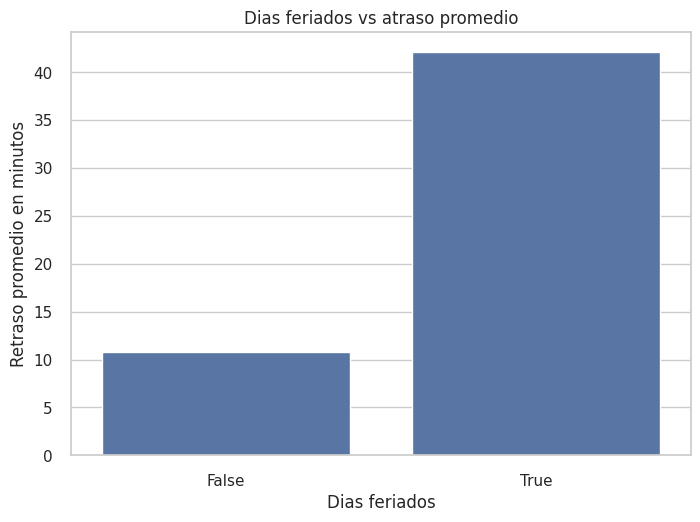

In [189]:
# dias feriados

avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Dias feriados vs atraso promedio')
plt.xlabel('Dias feriados')
plt.ylabel('Retraso promedio en minutos')
plt.show()


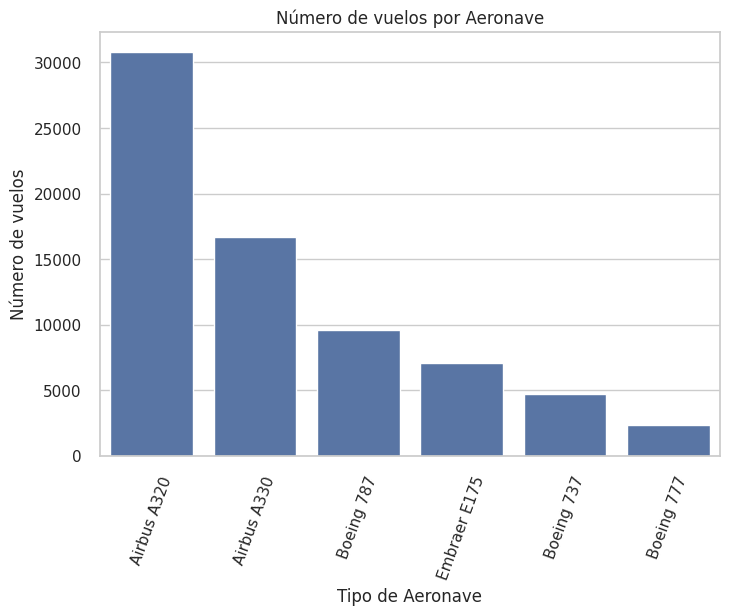

In [190]:
# cantidad de aeronoves
order = datos['aircraft_type'].value_counts().index
sns.countplot(x='aircraft_type', data=datos, order=order)
plt.title('Número de vuelos por Aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Número de vuelos')
plt.show()

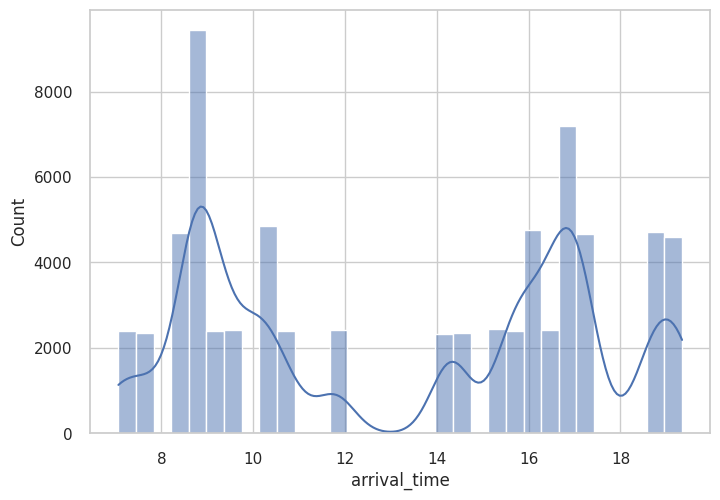

In [191]:
# histograma
sns.histplot(data=datos, x='arrival_time', kde=True)
plt.show()



In [192]:
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power((len(df[columna])),-1/3)
  return ancho

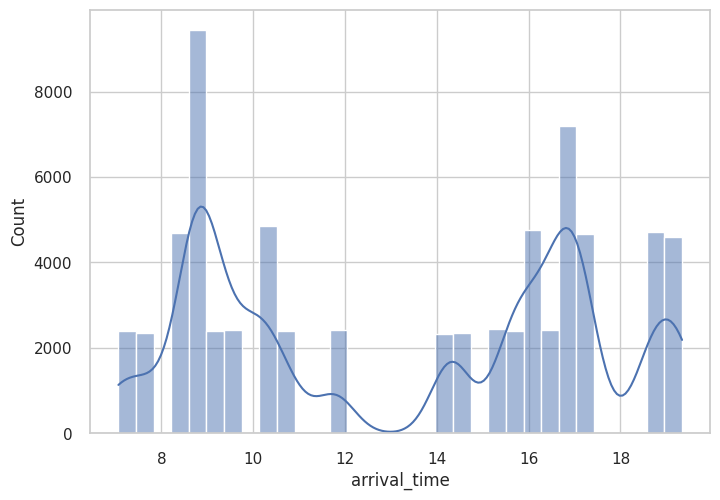

In [193]:
# crear variable

binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=binwidth)
plt.show()

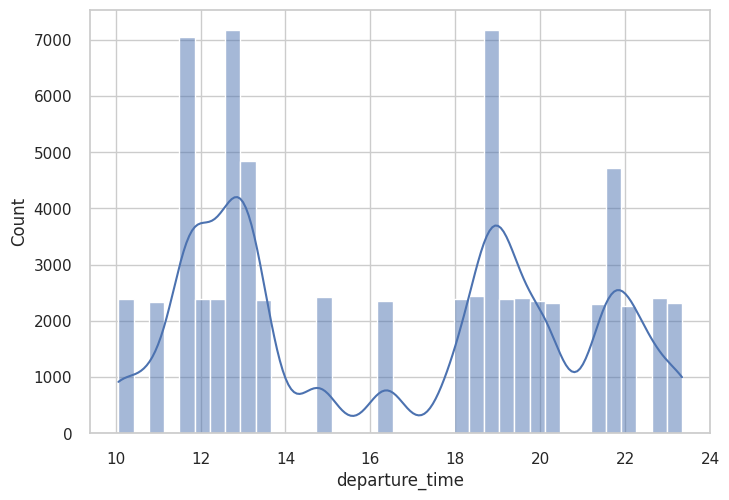

In [194]:
# varible hora de partidaa

binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=binwidth)
plt.show()

In [195]:
# variable atraso promedio
atraso_promedio =datos['delay'].mean()
atraso_mediana = datos['delay'].median()

print(f'Atraso promedio: {atraso_promedio}')
print(f'Atraso mediana: {atraso_mediana}')

Atraso promedio: 12.548378015698628
Atraso mediana: 9.740453855590491


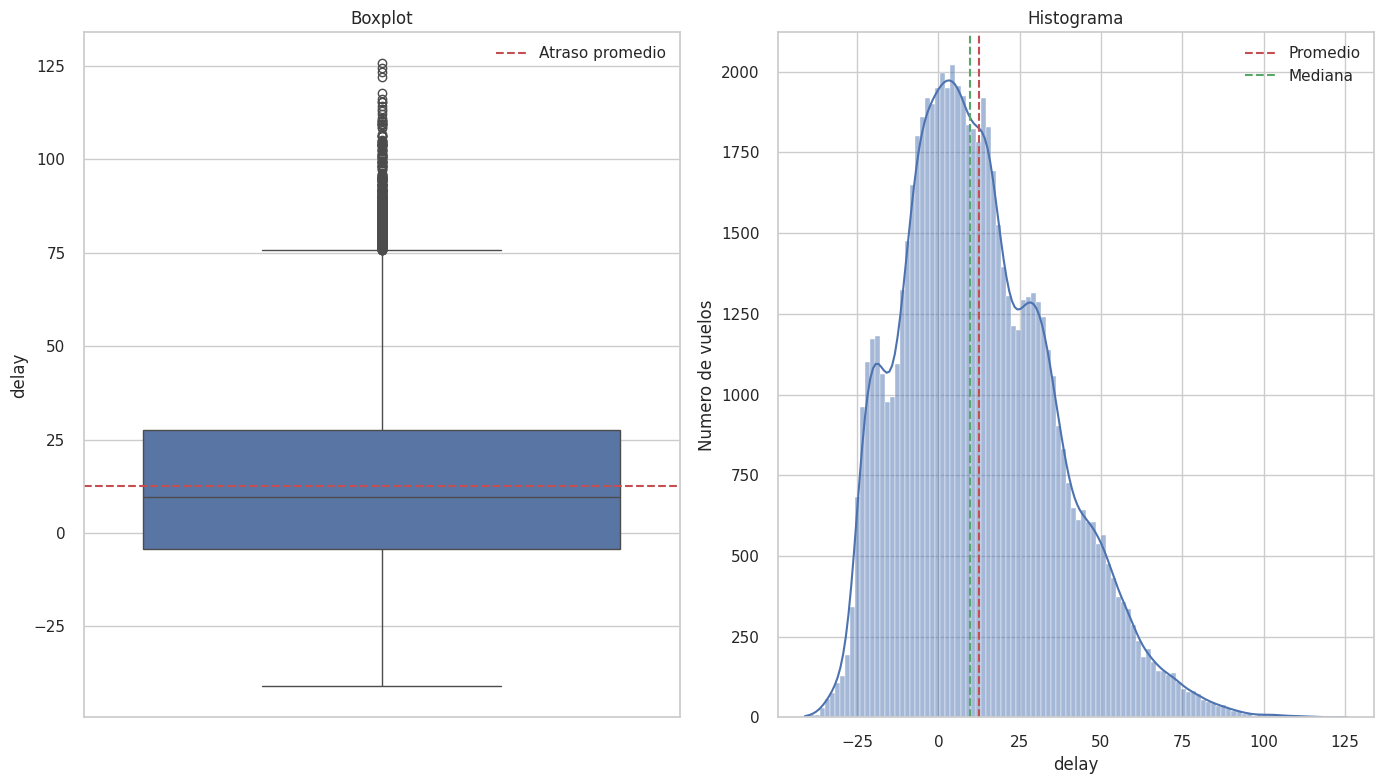

In [196]:
# haremos blotplot
fig, ax = plt.subplots(1,2,figsize=(14,8))

sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Atraso promedio')
#ax[0].axhline(y=atraso_mediana, color='g', linestyle='--', label='Atraso mediana')
ax[0].legend()

binwidth = ancho_bin(datos,'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], binwidth=binwidth, kde=True)
plt.ylabel('Numero de vuelos')
plt.grid(True)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='g', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

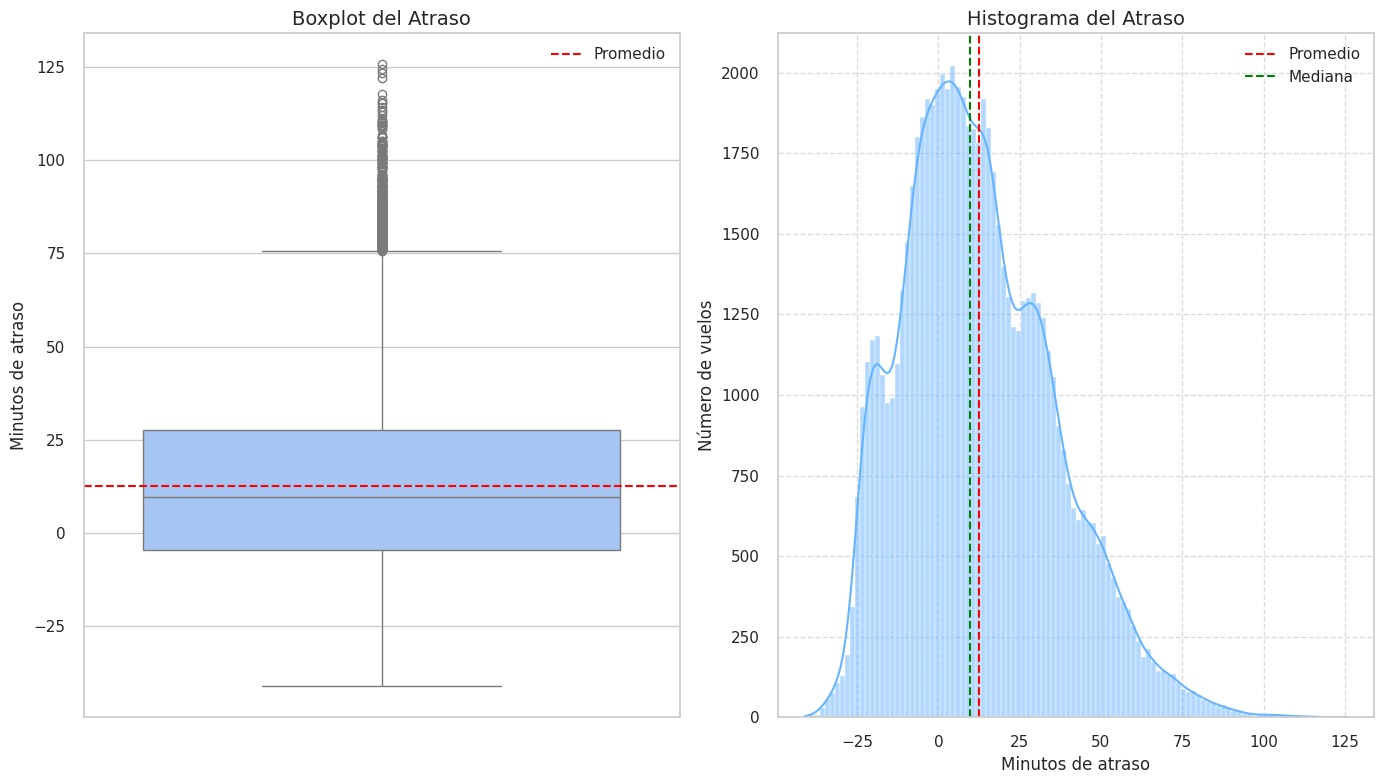

In [197]:

# Estilo claro y legible
sns.set_theme(style="whitegrid")

# Función para calcular ancho de bin (Regla de Freedman-Diaconis)
def ancho_bin(df, columna):
    q75, q25 = np.percentile(df[columna], [75 ,25])
    iqr = q75 - q25
    bin_width = 2 * iqr / np.cbrt(len(df[columna]))
    return bin_width

# Supongamos que tienes estos valores calculados:
# (Sustitúyelos con los reales si ya los tienes)
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

# Colores personalizados
color_box = '#99c2ff'     # azul claro
color_hist = '#66b3ff'    # azul intermedio
color_kde = '#3399ff'     # azul más fuerte
color_prom = 'red'
color_mediana = 'green'

# Crear figura con dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# Boxplot
sns.boxplot(data=datos, y='delay', ax=ax[0], color=color_box)
ax[0].set_title('Boxplot del Atraso', fontsize=14)
ax[0].axhline(y=atraso_promedio, color=color_prom, linestyle='--', label='Promedio')
# ax[0].axhline(y=atraso_mediana, color=color_mediana, linestyle='--', label='Mediana')  # opcional
ax[0].legend()
ax[0].set_ylabel('Minutos de atraso')
ax[0].set_xlabel('')

# Histograma
binwidth = ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], binwidth=binwidth,
             kde=True, color=color_hist)  # sin kde_kws
ax[1].set_title('Histograma del Atraso', fontsize=14)
ax[1].set_xlabel('Minutos de atraso')
ax[1].set_ylabel('Número de vuelos')
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].axvline(x=atraso_promedio, color=color_prom, linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color=color_mediana, linestyle='--', label='Mediana')
ax[1].legend()

# Ajustar espacio y mostrar
plt.tight_layout()
plt.show()

# <font color='#af7ac5'>**Class # 2**</h1>

In [198]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [199]:
# crear la columna fecha

datos['date'] = datos['year'].astype(str) + '-' + (datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [200]:
# crear una columna
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6])
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(7)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
46930,21,BZ,Boeing 737,schengen,FJB,7.065594,10.065594,208,2018,False,23.063528,2018-07-28,True,Saturday
21989,30,BZ,Embraer E175,schengen,PUA,8.923441,12.923441,5,2014,False,-9.707524,2014-01-06,False,Monday
20752,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,288,2013,False,5.557508,2013-10-16,False,Wednesday
12839,18,BZ,Airbus A320,schengen,TZF,14.258911,20.258911,125,2012,False,26.318394,2012-05-05,True,Saturday
40701,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,158,2017,False,-4.569827,2017-06-08,False,Thursday
7293,9,BZ,Airbus A330,non-schengen,TZF,10.733469,12.733469,121,2011,False,-13.005561,2011-05-02,False,Monday
3570,11,BZ,Airbus A320,non-schengen,EMM,10.177197,13.177197,238,2010,False,20.862927,2010-08-27,False,Friday


### <font color='#cb4335'>**Seguimos teniendo mucha variables categoricas en el DataFrame Debemos dejar una sola**</h2>

In [201]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

###  **que vamos a hacer pasar los datos a int para poder hacer el machine learning**

In [202]:
# iniciamos
pd.set_option('future.no_silent_downcasting', False)

datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen': 1}).astype(int)
datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True: 1}).astype(int)
datos['is_weekend'] = datos['is_weekend'].replace({False: 0, True: 1}).astype(int)

/tmp/ipython-input-202-1741951684.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen': 1}).astype(int)
/tmp/ipython-input-202-1741951684.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True: 1}).astype(int)
/tmp/ipython-input-202-1741951684.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call

In [203]:
datos.sample(4)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
60725,23,YE,Embraer E175,1,TCY,18.801235,21.801235,33,2021,0,5.996255,2021-02-03,0,Wednesday
48602,4,BZ,Airbus A330,1,TCY,11.781391,14.781391,320,2018,0,-20.614384,2018-11-17,1,Saturday
14739,4,BZ,Airbus A330,1,TCY,11.781391,14.781391,252,2012,0,5.879035,2012-09-09,1,Sunday
49981,14,BZ,Airbus A330,1,ZQO,7.708301,11.708301,47,2019,0,-18.943755,2019-02-17,1,Sunday


In [204]:
# varible categoricas
categoricas  = ['airline','aircraft_type','origin','day_name']

# para ceros y unos
pd.get_dummies(data=datos, columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [205]:
# nueva variable

datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
44407,21,1,7.065594,10.065594,40,2018,0,7.552867,2018-02-10,1,...,0,0,0,0,0,1,0,0,0,0
16553,24,1,9.668655,12.668655,8,2013,0,9.978448,2013-01-09,0,...,0,0,0,0,0,0,0,0,0,1
58787,21,1,7.065594,10.065594,269,2020,0,29.011865,2020-09-26,1,...,0,0,0,0,0,1,0,0,0,0
21585,25,0,19.341235,23.341235,344,2013,0,16.453995,2013-12-11,0,...,0,0,0,0,0,0,0,0,0,1
57775,20,1,16.909690,18.909690,201,2020,0,12.882195,2020-07-20,0,...,0,0,0,0,1,0,0,0,0,0


In [206]:
# usar metodo correlaciones

datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [207]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

In [208]:
# quitamos columnas no necesarias

df = datos_codificados.drop(columns=['year','day','date','flight_id','departure_time'])
df.sample(5)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
335,0,16.571894,0,-7.493558,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
27341,0,16.718722,0,-8.791016,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
63928,1,17.033688,0,0.640058,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
38152,1,17.033688,0,20.445499,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
35163,0,8.939996,0,36.472759,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0


# <font color='#af7ac5'>**Class # 3**</h1>

### **usar esta biblioteca para regresiones y otras mas**

https://scikit-learn.org/stable/

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

X = df.drop(columns=['delay'],axis=1)
y = df['delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# crear modelo

baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [210]:
# evaluarlo

from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# variable

y_pred_dummy = baseline.predict(X_test)

# funcion

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
        'RMSE': round(rmse**(1/2), 4),# PARA CUADRA LOS MINUTOS OJO
        'MAE': round(mae, 4),
        'R2': round(r2, 4)
    }
  return metricas

In [211]:
# variable

resultados_baseline = calcular_regresion(y_test,y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

In [212]:
# BOSQUE ALEATORIOS

from sklearn.ensemble import RandomForestRegressor

# crear modelo

modelo = RandomForestRegressor(max_depth=5,random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test,y_pred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


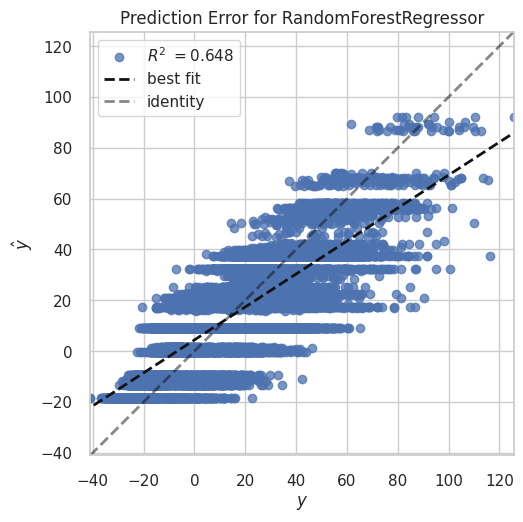

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [213]:
# visualizar

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(modelo)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


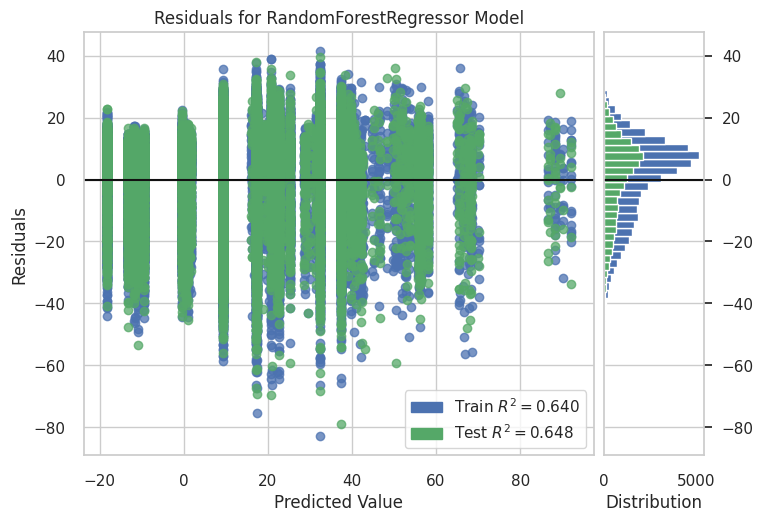

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [214]:
from yellowbrick.regressor import ResidualsPlot

visualizador = ResidualsPlot(modelo)
visualizador.fit(X_train, y_train)
visualizador.score(X_test, y_test)
visualizador.show()

In [215]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

cv = KFold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X, y, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([ 4.20687532,  4.77869844,  4.5846386 ,  4.26136756, 10.21940303]),
 'score_time': array([0.08750176, 0.09427977, 0.07268167, 0.07196641, 0.27798223]),
 'test_RMSE': array([-13.79849333, -13.83688865, -13.70475921, -14.02739434,
        -13.8788739 ]),
 'test_MAE': array([-11.05948108, -11.08233021, -11.06018802, -11.2515775 ,
        -11.14503588]),
 'test_R2': array([0.64659891, 0.6431519 , 0.64503411, 0.62942845, 0.64219271])}

# <font color='#af7ac5'>**Class # 4**</h1>

In [216]:
# ver los atributos

len(df.columns)

31

In [217]:
importances = modelo.feature_importances_

In [218]:
# crear nuevo dataframe con columnas importantes

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importances': (importances*100).round(2)}).sort_values('Importances', ascending=False)
feature_importances

,Feature,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [219]:
# elaboramos

resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,35,5)] # rango inclusivo

for i in ct_features:
  selected_features = feature_importances['Feature'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_pred_selected = model_features.predict(X_test_selected)
  metricas = calcular_regresion(y_test, y_pred_selected)
  resultados[i] = metricas.values()

resultados


,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [220]:
# elaboramos este es exclusivo

resultados = pd.DataFrame(index=['RMSE','MAE','R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = range(10,16) # rango exclusivo

for i in ct_features:
  selected_features = feature_importances['Feature'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_pred_selected = model_features.predict(X_test_selected)
  metricas = calcular_regresion(y_test, y_pred_selected)
  resultados[i] = metricas.values()

resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [221]:
selected_features = feature_importances['Feature'].values[:13]
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [222]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

In [223]:
# hiperparametros
param_grid= {
             'max_depth': [5, 10, 15],
             'min_samples_split': [2, 4, 6],
             'min_samples_leaf': [1, 2, 3],
             'n_estimators': [100, 150, 200]
            }


In [225]:
from sklearn.model_selection import GridSearchCV, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grind = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid,
                           cv=cv, scoring='r2')
model_grind.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [226]:
model_grind.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [227]:
y_pred_grid = model_grind.predict(X_test)
metricas_model_grind = calcular_regresion(y_test, y_pred_grid)
metricas_model_grind

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [228]:
resultados['modelo_grid'] = list(metricas_model_grind.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6296
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6754


In [229]:
import pickle

try:
  with open('champion.pkl', 'wb') as archivo_salida:
    pickle.dump(model_grind.best_estimator_, archivo_salida)
  print('Modelo guardado con exito')
except Exception as e:
  print(f'Error al guardar el modelo: ',str(e))

Modelo guardado con exito
